In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../src")

In [2]:
import numpy as np
import xarray as xr

import fields
import model
import plot

%matplotlib inline

In [3]:
ds = xr.open_dataset("../data/exp_pro/OCO2_MODIS_4x5deg_monthly_conus_augmented.nc")
ds = ds.where(ds.time.dt.year > 2014, drop=True)

# Format as multi-fields
ds_xco2 = ds[["xco2", "xco2_var"]]
ds_sif = ds[["sif", "sif_var", "evi"]]

datasets = [ds_xco2, ds_sif]
covariates = [["lon", "lat"], ["evi"]]
timedeltas = [0, -1]
vario_config = fields.VarioConfig(1500, 30)

In [4]:
mf = fields.MultiField(
        datasets, covariates, np.datetime64("2016-08-01"), timedeltas
    )
gamma = mf.empirical_variograms(vario_config)

In [8]:
mod = model.FullBivariateMatern()
mod.fit(gamma)
mod.params.to_dataframe()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<ufunc 'kv'>) found for signature:
 
 >>> kv(float64, array(float64, 1d, C))
 
There are 2 candidate implementations:
    - Of which 2 did not match due to:
    Overload of function 'kv': File: numba_scipy/special/overloads.py: Line 9.
      With argument(s): '(float64, array(float64, 1d, C))':
     No match.

During: resolving callee type: Function(<ufunc 'kv'>)
During: typing of call at /Users/joshjacobson/Projects/sif-data-fusion/research/../src/model.py (393)


File "../src/model.py", line 393:
def _matern_correlation(nu: float, len_scale: float, h: np.ndarray) -> np.ndarray:
    <source elided>
        + nu * np.log(np.sqrt(2.0 * nu) * h_positive_scaled)
    ) * sps.kv(nu, np.sqrt(2.0 * nu) * h_positive_scaled)
    ^


In [ ]:
mod.fit_result.params.to_dataframe()

,name,value,bounds
0,sigma_11,1.022812,"(0.4, 3.5)"
1,sigma_22,1.111089,"(0.4, 3.5)"
2,nu_11,0.760991,"(0.2, 3.5)"
3,nu_12,3.500000,"(0.2, 3.5)"
4,nu_22,0.865811,"(0.2, 3.5)"
5,len_scale_11,366.403262,"(100.0, 2000.0)"
6,len_scale_12,2000.000000,"(100.0, 2000.0)"
7,len_scale_22,665.902093,"(100.0, 2000.0)"
8,nugget_11,0.057774,"(0.0, 0.2)"
9,nugget_22,0.025698,"(0.0, 0.2)"


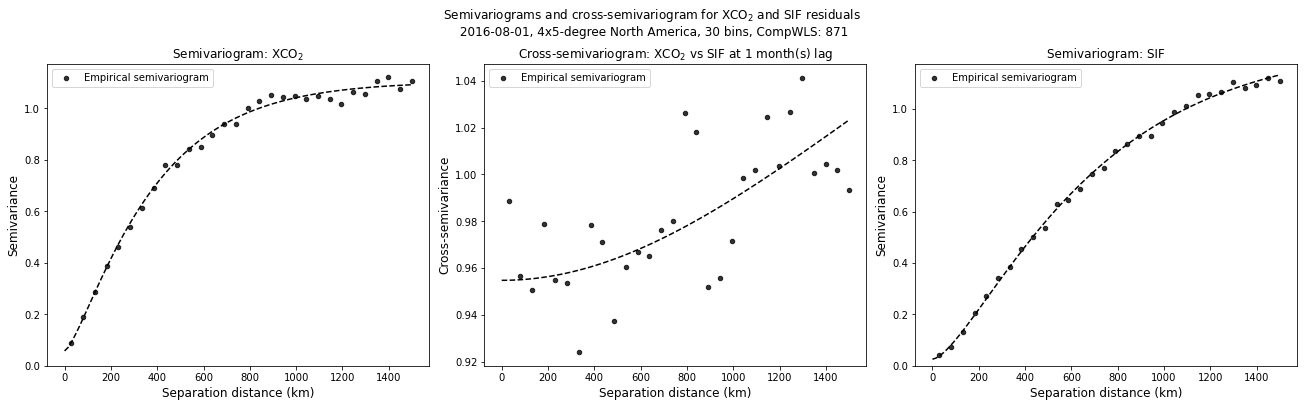

In [ ]:
plot.plot_variograms(mod.fit_result, ["XCO$_2$", "SIF"])